# Import Dependencies

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import os
import json
import requests

# clean_fl_ccd_directory DataFrame

In [3]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_directory_response = requests.get(query_url)
fl_ccd_directory_data = fl_ccd_directory_response.json()

# Establish the results from the request to loop through below
results_directory = fl_ccd_directory_data['results']

# Create Lists to store values for the columns
district_name = []
dir_nces_id = []
state_id = []
latitude = []
longitude = []
urban_locale = []
agency_type = []
total_schools = []
total_students = []
spec_ed_stud = []
eng_lang_stud = []
teachers_fte = []
instru_aids_fte = []
guidance_cons_fte = []
school_staff_fte = []
district_staff_fte = []
staff_total_fte = []

# Loop through results and store values in appropriate lists
for result in results_directory:
    district_name.append(result['lea_name'])
    dir_nces_id.append(result['leaid'])
    state_id.append(result['state_leaid'])
    latitude.append(result['latitude'])
    longitude.append(result['longitude'])
    urban_locale.append(result['urban_centric_locale'])
    agency_type.append(result['agency_type'])
    total_schools.append(result['number_of_schools'])
    total_students.append(result['enrollment'])
    spec_ed_stud.append(result['spec_ed_students'])
    eng_lang_stud.append(result['english_language_learners'])
    teachers_fte.append(result['teachers_total_fte'])
    instru_aids_fte.append(result['instructional_aides_fte'])
    guidance_cons_fte.append(result['guidance_counselors_total_fte'])
    school_staff_fte.append(result['school_staff_total_fte'])
    district_staff_fte.append(result['lea_staff_total_fte'])
    staff_total_fte.append(result['staff_total_fte'])
    
# Create dataframe from results
fl_ccd_directory = pd.DataFrame({"District Name":district_name, "NCES ID":dir_nces_id, "State ID":state_id,                          
                                 "Degree of urbanization":urban_locale, "Agency Type":agency_type,
                                "Total Schools":total_schools, "Total Students Enrolled":total_students,
                                "Special Ed Students":spec_ed_stud, "English Language Students":eng_lang_stud,
                                "Total FTE Teachers":teachers_fte, "Total FTE Instructional Aids": instru_aids_fte,
                                "Total FTE Guidance Counselors": guidance_cons_fte, "Total FTE School Staff":school_staff_fte,
                                "Total FTE District Staff": district_staff_fte, "Total FTE Staff": staff_total_fte,
                                 "Latitude":latitude, "Longitude":longitude})

# Remove all districts that are not regular local school district
clean_fl_ccd_directory = fl_ccd_directory.loc[fl_ccd_directory['Agency Type'] == 1]


# Format columns
# clean_fl_ccd_directory = clean_fl_ccd_directory.style.format({"Total Students Enrolled": "{:,}" , "Special Ed Students": "{:,}",
#                                                             "English Language Students":"{:,}"})

clean_fl_ccd_directory

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,Total FTE Instructional Aids,Total FTE Guidance Counselors,Total FTE School Staff,Total FTE District Staff,Total FTE Staff,Latitude,Longitude
2,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,535,61,None,None,4249,29.652601,-82.318977
3,BAKER,1200060,02,32,1,9,4936,538,11,301,65,10,None,None,604,30.277151,-82.118149
5,BAY,1200090,03,22,1,51,27641,4575,567,1844,732,66,None,None,3735,30.172516,-85.675934
6,BRADFORD,1200120,04,32,1,12,3199,645,6,242,56,8,None,None,507,29.951584,-82.112663
7,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,791,183,None,None,9109,28.248600,-80.736115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,UNION,1201890,63,32,1,9,2384,387,0,175,32,6,None,None,343,30.017477,-82.338341
66,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,593,142,None,None,7586,29.030180,-81.308472
67,WAKULLA,1201950,65,42,1,15,5141,976,8,327,84,9,None,None,708,30.176279,-84.379211
68,WALTON,1201980,66,41,1,23,8435,799,300,569,99,18,None,None,1164,30.720671,-86.098549


# drop_ids District Name List

In [4]:
# Create a list of district names that were not regular local schools to drop from other tables
drop_agencies = fl_ccd_directory[fl_ccd_directory['Agency Type'] != 1]
drop_ids = drop_agencies['District Name'].tolist()

drop_ids

['FL VIRTUAL',
 'CESA',
 'LAKE WALES CHARTER SCHOOLS',
 'WASH SPECIAL',
 'FAU LAB SCH',
 'FSU LAB SCH',
 'FAMU LAB SCH',
 'UF LAB SCH',
 'DEAF/BLIND']

# fl_saipe_poverity DataFrame

In [5]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/saipe/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_saipe_poverty_response = requests.get(query_url)
fl_saipe_poverty_data = fl_saipe_poverty_response.json()

# Establish the results from the request to loop through below
results_poverity = fl_saipe_poverty_data['results']

# Create Lists to store values for the columns
pov_nces_id = []
est_pop_total = []
est_pop_5to17 = []
est_pop_5to17_perc = []
est_pop_5to17_poverity = []
est_pop_5to17_poverity_perc = []


# Loop through results and store values in appropriate lists
for result in results_poverity:
    pov_nces_id.append(result['leaid'])
    est_pop_total.append(result['est_population_total'])
    est_pop_5to17.append(result['est_population_5_17'])
    est_pop_5to17_perc.append(result['est_population_5_17_pct'])
    est_pop_5to17_poverity.append(result['est_population_5_17_poverty'])
    est_pop_5to17_poverity_perc.append(result['est_population_5_17_poverty_pct'])

    
# Create dataframe from results
fl_saipe_poverity = pd.DataFrame({"NCES ID":pov_nces_id, "Estimated Total Population":est_pop_total, 
                                 "Estimated Total Population Ages 5–17":est_pop_5to17,                        
                                 "Share of Population that are school ages 5–17":est_pop_5to17_perc, 
                                 "Estimated Population Ages 5–17 in poverity":est_pop_5to17_poverity,
                                "Share of School-Age Population (5–17) in poverity":est_pop_5to17_poverity_perc})

# Format columns
# clean_fl_saipe_poverity = fl_saipe_poverity.style.format({"Estimated Total Population":"{:,.0f}", 
#                                                          "Estimated Total Population Ages 5–17":"{:,.0f}",                        
#                                                          "Share of Population that are school ages 5–17":"{:.2%}", 
#                                                          "Estimated Population Ages 5–17 in poverity":"{:,.0f}",
#                                                          "Share of School-Age Population (5–17) in poverity":"{:.2%}"
#                                                         })

fl_saipe_poverity

,NCES ID,Estimated Total Population,Estimated Total Population Ages 5–17,Share of Population that are school ages 5–17,Estimated Population Ages 5–17 in poverity,Share of School-Age Population (5–17) in poverity
0,1200030,256380.0,32012.0,0.124862,6438.0,0.201112
1,1200060,27093.0,5004.0,0.184697,1146.0,0.229017
2,1200090,178985.0,27626.0,0.154348,5939.0,0.214979
3,1200120,26702.0,3847.0,0.144072,1047.0,0.272160
4,1200150,556885.0,78183.0,0.140393,15431.0,0.197370
...,...,...,...,...,...,...
62,1201890,15190.0,2125.0,0.139895,510.0,0.240000
63,1201920,507531.0,67908.0,0.133801,16530.0,0.243418
64,1201950,31432.0,4887.0,0.155478,926.0,0.189482
65,1201980,61530.0,9060.0,0.147245,2256.0,0.249007


# Financial DataFrame

In [6]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/finance/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_finance_response = requests.get(query_url)
fl_ccd_finance_data = fl_ccd_finance_response.json()

# Establish the results from the request to loop through below
results_financial = fl_ccd_finance_data['results']

# Create Lists to store values for the columns
fin_nces_id = []
total_rev = []
fed_total_rev = []
st_total_rev = []
loc_total_rev = []
loc_prop_tax_rev = []
intruct_staff_exp = []
general_admin_exp = []
school_admin_exp = []
operation_plant_exp = []
student_transport_exp = []

# Loop through results and store values in appropriate lists
for result in results_financial:
    fin_nces_id.append(result['leaid'])
    total_rev.append(result['rev_total'])
    fed_total_rev.append(result['rev_fed_total'])
    st_total_rev.append(result['rev_state_total'])
    loc_total_rev.append(result['rev_local_total'])
    loc_prop_tax_rev.append(result['rev_local_prop_tax'])
    intruct_staff_exp.append(result['exp_current_instruc_staff'])
    general_admin_exp.append(result['exp_current_general_admin'])
    school_admin_exp.append(result['exp_current_sch_admin'])
    operation_plant_exp.append(result['exp_current_operation_plant'])
    student_transport_exp.append(result['exp_current_student_transport'])
    
# Create dataframe from results
fl_ccd_financial = pd.DataFrame({"NCES ID":fin_nces_id, "Total Revenue":total_rev, "Total Federal Revenue":fed_total_rev,                        
                                 "Total State Revenue":st_total_rev, "Total Local Revenue":loc_total_rev,
                                "Local Revenue (Property Tax)":loc_prop_tax_rev, "Total Expense for Instruction Staff":intruct_staff_exp,
                                "Total Expense for General Admin":general_admin_exp, "Total Expense for School Admin":school_admin_exp,
                                "Total Expense for Operations":operation_plant_exp, "Total Expense for Student Transportation":student_transport_exp})

# Remove all districts without financial data
clean_fl_ccd_financial = fl_ccd_financial.loc[fl_ccd_financial['Total Revenue'] > 0]

clean_fl_ccd_financial

,NCES ID,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
2,1200030,272451000.0,34881000.0,119810000.0,117760000,103083000,21763000,3041000,13128000,29535000,11174000
3,1200060,42674000.0,4704000.0,29197000.0,8773000,6266000,2595000,732000,2007000,4385000,2613000
5,1200090,268131000.0,26772000.0,103527000.0,137832000,101316000,11183000,2045000,13550000,20567000,8132000
6,1200120,31053000.0,4941000.0,17021000.0,9091000,6476000,1490000,734000,1792000,3197000,1629000
7,1200150,673236000.0,76493000.0,320008000.0,276735000,221801000,49626000,5282000,36220000,55676000,17750000
...,...,...,...,...,...,...,...,...,...,...,...
65,1201890,21137000.0,2718000.0,15149000.0,3270000,1814000,1348000,674000,853000,2083000,706000
66,1201920,595156000.0,69002000.0,255682000.0,270472000,203540000,37538000,4455000,36135000,50429000,16515000
67,1201950,44700000.0,4754000.0,28484000.0,11462000,9449000,1768000,1243000,2650000,5404000,2823000
68,1201980,101614000.0,8332000.0,16320000.0,76962000,70781000,5280000,1007000,5026000,9890000,4787000


# fl_nces_combined DataFrame

In [7]:
# Combined all above API calls in to one dataframe to match with District Name

dem_pov_nces_combined = pd.merge(clean_fl_ccd_directory,fl_saipe_poverity, on="NCES ID")
fl_nces_combined = pd.merge(dem_pov_nces_combined,clean_fl_ccd_financial, on="NCES ID")
fl_nces_combined

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,...,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
0,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,...,272451000.0,34881000.0,119810000.0,117760000,103083000,21763000,3041000,13128000,29535000,11174000
1,BAKER,1200060,02,32,1,9,4936,538,11,301,...,42674000.0,4704000.0,29197000.0,8773000,6266000,2595000,732000,2007000,4385000,2613000
2,BAY,1200090,03,22,1,51,27641,4575,567,1844,...,268131000.0,26772000.0,103527000.0,137832000,101316000,11183000,2045000,13550000,20567000,8132000
3,BRADFORD,1200120,04,32,1,12,3199,645,6,242,...,31053000.0,4941000.0,17021000.0,9091000,6476000,1490000,734000,1792000,3197000,1629000
4,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,...,673236000.0,76493000.0,320008000.0,276735000,221801000,49626000,5282000,36220000,55676000,17750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,UNION,1201890,63,32,1,9,2384,387,0,175,...,21137000.0,2718000.0,15149000.0,3270000,1814000,1348000,674000,853000,2083000,706000
63,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,...,595156000.0,69002000.0,255682000.0,270472000,203540000,37538000,4455000,36135000,50429000,16515000
64,WAKULLA,1201950,65,42,1,15,5141,976,8,327,...,44700000.0,4754000.0,28484000.0,11462000,9449000,1768000,1243000,2650000,5404000,2823000
65,WALTON,1201980,66,41,1,23,8435,799,300,569,...,101614000.0,8332000.0,16320000.0,76962000,70781000,5280000,1007000,5026000,9890000,4787000


# 21+ Absent Data

In [8]:
# Read in Florida District 21+ Absents Data
fl_2014_21absents_path = "fldoe_data/2014_FL_21absents.xlsx"
fl_2014_21absents_data = pd.read_excel(os.path.join(fl_2014_21absents_path), header=2)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_21absents=fl_2014_21absents_data[~fl_2014_21absents_data["District Name"].isin(drop_ids)]

clean_fl_2014_21absents

,District #,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days
0,0,FLORIDA,3111840,303913,0.097663
1,1,ALACHUA,32688,3101,0.094867
2,2,BAKER,5377,1005,0.186907
3,3,BAY,32074,4095,0.127674
4,4,BRADFORD,3820,703,0.184031
...,...,...,...,...,...
62,63,UNION,2644,465,0.175870
63,64,VOLUSIA,70784,7841,0.110774
64,65,WAKULLA,5615,989,0.176135
65,66,WALTON,9621,723,0.075148


# Dropout Data

In [9]:
# Read in Florida District Dropout Data
fl_2014_dropout_path = "fldoe_data/2014_FL_dropout_rates.xls"
fl_2014_dropout_data = pd.read_excel(os.path.join(fl_2014_dropout_path),header=4)

# Remove all district names that were dropped due to not local school district and state total
clean_fl_2014_dropout=fl_2014_dropout_data[~fl_2014_dropout_data["District Name"].isin(drop_ids)]
clean_fl_2014_dropout = clean_fl_2014_dropout.loc[clean_fl_2014_dropout['District Name'] != "FLORIDA"]

clean_fl_2014_dropout

pd.set_option("display.max_rows", None, "display.max_columns", None)

clean_fl_2014_dropout

white = clean_fl_2014_dropout["White Dropouts (numerator)"]
black = clean_fl_2014_dropout["Black Dropouts (numerator)"]
hispanic = clean_fl_2014_dropout["Hispanic Dropouts (numerator)"]
asain = clean_fl_2014_dropout["Asian Dropouts (numerator)"]
pacific_islander = clean_fl_2014_dropout["Pacific Islander Dropouts (numerator)"]
american_indian = clean_fl_2014_dropout["American Indian Dropouts (numerator)"]
two_or_more_races = clean_fl_2014_dropout["Two or More Races Dropouts (numerator)"]
total_dropouts = clean_fl_2014_dropout["Total Dropouts (numerator)"]
district_name = clean_fl_2014_dropout["District Name"]

dropouts = pd.DataFrame({"District Name":district_name, "White Total Dropouts":white, "Black or African American Total Dropouts":black, 
                         "Hispanic or Latino Total Dropouts":hispanic, "Asian Total Dropouts":asain, 
                         "Native Hawaiian or Other Pacific Islander Total Dropouts": pacific_islander, 
                         "American Indian or Alaska Native Total Dropouts":american_indian, 
                         "Two or More Races Dropouts":two_or_more_races, "Total Dropouts":total_dropouts})

dropouts

,District Name,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts
1,ALACHUA,58,174,17,1,*,1,14,265
2,BAKER,13,0,0,*,*,*,0,13
3,BAY,65,16,8,2,*,0,4,95
4,BRADFORD,2,4,0,*,*,*,0,6
5,BREVARD,101,48,26,1,0,0,15,191
6,BROWARD,235,754,235,16,1,4,15,1260
7,CALHOUN,11,2,1,0,0,*,1,16
8,CHARLOTTE,165,20,23,1,*,0,4,213
9,CITRUS,63,6,5,0,*,0,4,79
10,CLAY,97,27,2,0,0,0,5,131


# District Demographic Membership Data

In [10]:
# Read in Florida District Demographic Data
fl_2014_demographics_path = "fldoe_data/2014_FL_membership_demographics.xls"
fl_2014_demographics_data = pd.read_excel(os.path.join(fl_2014_demographics_path), sheet_name = "DISTRICT", header=4)

# Remove all district names that were dropped due to not local school district and only selct rows for district totals
clean_fl_2014_demographics=fl_2014_demographics_data[~fl_2014_demographics_data["District"].isin(drop_ids)]
clean_fl_2014_demographics = clean_fl_2014_demographics.loc[clean_fl_2014_demographics['Grade'] == "TOTAL"]

rename_demographics = clean_fl_2014_demographics.rename(columns={"District": "District Name"})

# clean_fl_2014_demographics
rename_demographics

,District #,District Name,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races,Female Total,Male Total,Total
14,1,ALACHUA,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676
29,2,BAKER,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937
44,3,BAY,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561
59,4,BRADFORD,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186
74,5,BREVARD,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279
89,6,BROWARD,TOTAL,61716,105778,81542,9410,339,790,6832,128938,137469,266407
104,7,CALHOUN,TOTAL,1736,241,146,9,1,12,128,1133,1140,2273
119,8,CHARLOTTE,TOTAL,11445,1457,2209,235,21,47,717,7780,8351,16131
134,9,CITRUS,TOTAL,12370,698,1113,274,20,52,596,7408,7715,15123
149,10,CLAY,TOTAL,24293,5006,3799,925,114,76,1624,17277,18560,35837


# Free and Reduced Lunches Data

In [11]:
# Read in Florida District Free and Reduced Lunch Data - specific sheet read is the latest survey for the year
#2014-15 SURVEY 3 PRELIMINARY DATA (as of 5/5/2015)
fl_2014_lunch_path = "fldoe_data/2014_FL_lunch_status.xlsx"
fl_2014_lunch_data = pd.read_excel(os.path.join(fl_2014_lunch_path), sheet_name = "Demo Preliminary Survey 3-Dist",
                                  header=4)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_lunch = fl_2014_lunch_data[~fl_2014_lunch_data["District Name"].isin(drop_ids)]

# Groupby District Number
grouped_lunch = clean_fl_2014_lunch.groupby(["District Number","District Name"])

grouped_lunch.sum()

# Renaming and dropping unwanted columns
# clean_fl_2014_lunch.rename(columns={"Unnamed: 5": "White Total", "Unnamed: 8": "Black or African American Total", 
#                                    "Unnamed: 11": "Hispanic or Latino Total", "Unnamed: 14": "Asian Total", 
#                                    "Unnamed: 17": "Native Hawaiian or Other Pacific Islander Total", 
#                                    "Unnamed: 20": "American Indian or Alaska Native Total", 
#                                    "Unnamed: 23": "Two or More Races Total"}, inplace=True)
# clean_fl_2014_lunch.drop(["Unnamed: 4", "White", "Black or African American", "Unnamed: 7", "Hispanic or Latino", 
#                          "Unnamed: 10", "Asian", "Unnamed: 13", "Native Hawaiian or Other Pacific Islander", 
#                          "Unnamed: 16", "American Indian or Alaska Native", "Unnamed: 19", "Two or More Races", 
#                          "Unnamed: 22", "Unnamed: 25", "Unnamed: 26"], axis=1)

white = grouped_lunch.sum()["Unnamed: 5"]
black_or_african_american = grouped_lunch.sum()["Unnamed: 8"]
hispanic_or_latino = grouped_lunch.sum()["Unnamed: 11"]
asain = grouped_lunch.sum()["Unnamed: 14"]
native_hawaiian_or_other_pacific_islander = grouped_lunch.sum()["Unnamed: 17"]
american_indian_or_alaska_native = grouped_lunch.sum()["Unnamed: 20"]
two_or_more_races = grouped_lunch.sum()["Unnamed: 23"]
total = grouped_lunch.sum()["Total"]


lunch = pd.DataFrame({"White Total":white, "Black or African American Total":black_or_african_american, "Hispanic or Latino Total":hispanic_or_latino, 
                     "Asian Total":asain, "Native Hawaiian or Other Pacific Islander Total": native_hawaiian_or_other_pacific_islander, 
                     "American Indian or Alaska Native Total":american_indian_or_alaska_native, "Two or More Races":two_or_more_races, 
                     "Total": total})
lunch

,,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races,Total
District Number,District Name,,,,,,,,
1.0,ALACHUA,3625,8025,1293,282,12,27,987,6858
2.0,BAKER,2256,523,63,10,1,11,114,1432
3.0,BAY,10473,3581,1316,316,27,82,1092,8214
4.0,BRADFORD,1526,649,57,7,10,6,69,1131
5.0,BREVARD,18400,8368,6044,462,54,92,2913,17632
6.0,BROWARD,21407,87683,50469,3963,222,419,3774,81121
7.0,CALHOUN,1109,204,122,3,0,9,96,747
8.0,CHARLOTTE,6681,1242,1782,153,12,36,527,5028
9.0,CITRUS,7911,558,866,109,8,37,473,4894


# Finding the Mean and Median for Dropout Rate

In [12]:
florida_dropout_rate = clean_fl_2014_dropout[["District Name", "Total Dropout Rate"]]
florida_dropout_rate

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279
6,BROWARD,0.014282
7,CALHOUN,0.022472
8,CHARLOTTE,0.035536
9,CITRUS,0.014999
10,CLAY,0.010588


In [13]:
florida_dropout_rate.describe()

,Total Dropout Rate
count,67.000000
mean,0.016037
std,0.011796
min,0.000000
25%,0.007894
50%,0.011628
75%,0.022702
max,0.057082


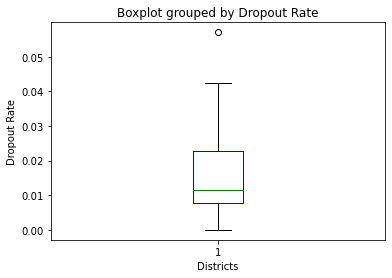

In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
quartiles = florida_dropout_rate["Total Dropout Rate"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest with Matplotlib
plt.boxplot(florida_dropout_rate["Total Dropout Rate"], patch_artist=False,
                medianprops=dict(color="g"),boxprops=dict(color="b"))
plt.title("Boxplot grouped by Dropout Rate")
plt.ylabel('Dropout Rate')
plt.xlabel('Districts')
plt.show()

outliers = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] < lower_bound) | 
                                      (florida_dropout_rate["Total Dropout Rate"] > upper_bound)]

In [15]:
# Create a clean DataFrame by dropping the outlier.
clean_dropout_rate = florida_dropout_rate.loc[florida_dropout_rate["District Name"]!= "DESOTO"]
districts = clean_dropout_rate["District Name"]
clean_dropout_rate

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279
6,BROWARD,0.014282
7,CALHOUN,0.022472
8,CHARLOTTE,0.035536
9,CITRUS,0.014999
10,CLAY,0.010588


In [16]:
# mean = florida_dropout_rate["Total Dropout Rate"].mean()
# mean

In [17]:
# florida_dropout_rate_df = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > .011) & (florida_dropout_rate["Total Dropout Rate"] < .021)]

In [18]:
# florida_dropout_rate_df = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > mean - .004) & (florida_dropout_rate["Total Dropout Rate"] < mean + .004)]
# florida_dropout_rate_df

In [19]:
# median = florida_dropout_rate["Total Dropout Rate"].median()
# median

In [20]:
# florida_dropout_rate_median = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > median - .002) & (florida_dropout_rate["Total Dropout Rate"] < median + .003)]
# florida_dropout_rate_median

In [21]:
# florida_dropout_rate_median["Above/Below"] = np.where(florida_dropout_rate_median['Total Dropout Rate'] > median, 'Above', 'Below')
# florida_dropout_rate_median

In [22]:
# florida_dropout_rate_df_above = florida_dropout_rate_df.loc[florida_dropout_rate_df["Total Dropout Rate"] > median]
# districts_above = florida_dropout_rate_df_above["District Name"]
# districts_above

In [23]:
# florida_dropout_rate_df_below = florida_dropout_rate_df.loc[florida_dropout_rate_df["Total Dropout Rate"] < median]
# districts_below = florida_dropout_rate_df_below["District Name"]
# districts_below

# Demographics Analysis:

In [149]:
demo_combined_start = pd.merge(clean_fl_2014_21absents, rename_demographics, on="District Name")
demo_combined = pd.merge(demo_combined_start, lunch, on="District Name")
demo_combined_final = pd.merge(demo_combined, dropouts, on="District Name")
demo_combined_last = pd.merge(demo_combined_final, clean_dropout_rate, on="District Name")
district_demographics = demo_combined_last[demo_combined_last["District Name"].isin(districts)]
district_demographics

,District #_x,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Female Total,Male Total,Total_x,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts,Total Dropout Rate
0,1,ALACHUA,32688,3101,0.094867,1,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676,3625,8025,1293,282,12,27,987,6858,58,174,17,1,*,1,14,265,0.028861
1,2,BAKER,5377,1005,0.186907,2,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937,2256,523,63,10,1,11,114,1432,13,0,0,*,*,*,0,13,0.009673
2,3,BAY,32074,4095,0.127674,3,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561,10473,3581,1316,316,27,82,1092,8214,65,16,8,2,*,0,4,95,0.011826
3,4,BRADFORD,3820,703,0.184031,4,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186,1526,649,57,7,10,6,69,1131,2,4,0,*,*,*,0,6,0.006283
4,5,BREVARD,81394,5316,0.065312,5,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279,18400,8368,6044,462,54,92,2913,17632,101,48,26,1,0,0,15,191,0.008279
5,6,BROWARD,297615,25541,0.085819,6,TOTAL,61716,105778,81542,9410,339,790,6832,128938,137469,266407,21407,87683,50469,3963,222,419,3774,81121,235,754,235,16,1,4,15,1260,0.014282
6,7,CALHOUN,2556,551,0.215571,7,TOTAL,1736,241,146,9,1,12,128,1133,1140,2273,1109,204,122,3,0,9,96,747,11,2,1,0,0,*,1,16,0.022472
7,8,CHARLOTTE,18356,1368,0.074526,8,TOTAL,11445,1457,2209,235,21,47,717,7780,8351,16131,6681,1242,1782,153,12,36,527,5028,165,20,23,1,*,0,4,213,0.035536
8,9,CITRUS,17130,1941,0.113310,9,TOTAL,12370,698,1113,274,20,52,596,7408,7715,15123,7911,558,866,109,8,37,473,4894,63,6,5,0,*,0,4,79,0.014999
9,10,CLAY,39922,3565,0.089299,10,TOTAL,24293,5006,3799,925,114,76,1624,17277,18560,35837,9893,3127,2200,341,29,39,833,7897,97,27,2,0,0,0,5,131,0.010588


In [150]:
district_demographics.describe()

,District #_x,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,Black or African American Total Dropouts,Total Dropouts,Total Dropout Rate
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,34.353846,47570.430769,4610.200000,0.127724,34.353846,6947.892308,7620.030769,9568.246154,428.00000,35.123077,81.276923,802.538462,12347.800000,83.369231,238.061538,0.015612
std,19.621760,75895.516319,7468.064781,0.055704,19.621760,7062.150122,15975.176666,25627.343400,809.84661,60.476883,142.673306,974.775937,21782.797241,220.594195,540.278686,0.010685
min,1.000000,998.000000,107.000000,0.042912,1.000000,97.000000,71.000000,33.000000,0.00000,0.000000,1.000000,5.000000,329.000000,0.000000,0.000000,0.000000
25%,18.000000,5377.000000,726.000000,0.085819,18.000000,1526.000000,510.000000,224.000000,10.00000,1.000000,10.000000,96.000000,1333.000000,2.000000,14.000000,0.007980
50%,35.000000,14582.000000,1538.000000,0.112164,35.000000,3774.000000,1668.000000,1316.000000,107.00000,8.000000,27.000000,340.000000,4307.000000,11.000000,76.000000,0.011628
75%,51.000000,50196.000000,5232.000000,0.163781,51.000000,10064.000000,7006.000000,6574.000000,372.00000,49.000000,92.000000,1183.000000,13595.000000,34.000000,168.000000,0.022472
max,67.000000,397704.000000,44608.000000,0.266667,67.000000,27063.000000,87683.000000,185132.000000,3963.00000,319.000000,950.000000,4594.000000,130779.000000,1147.000000,3108.000000,0.042532


In [151]:
low = district_demographics.loc[(district_demographics["Enrollments"] < 6500)]

low

,District #_x,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Female Total,Male Total,Total_x,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts,Total Dropout Rate
1,2,BAKER,5377,1005,0.186907,2,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937,2256,523,63,10,1,11,114,1432,13,0,0,*,*,*,0,13,0.009673
3,4,BRADFORD,3820,703,0.184031,4,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186,1526,649,57,7,10,6,69,1131,2,4,0,*,*,*,0,6,0.006283
6,7,CALHOUN,2556,551,0.215571,7,TOTAL,1736,241,146,9,1,12,128,1133,1140,2273,1109,204,122,3,0,9,96,747,11,2,1,0,0,*,1,16,0.022472
13,15,DIXIE,2310,616,0.266667,15,TOTAL,1783,152,80,7,,5,77,1059,1045,2104,1760,148,77,6,0,5,75,1036,1,0,0,*,0,*,0,1,0.001949
17,19,FRANKLIN,1485,295,0.198653,19,TOTAL,1019,142,59,4,2,2,55,620,663,1283,678,114,33,0,0,2,44,433,5,0,0,*,*,*,*,5,0.014837
19,21,GILCHRIST,2996,474,0.158211,21,TOTAL,2218,114,185,5,,3,78,1293,1310,2603,1082,96,127,2,0,1,55,661,0,0,2,*,0,*,0,2,0.002494
20,22,GLADES,1805,109,0.060388,22,TOTAL,606,125,554,9,,205,28,765,762,1527,342,112,516,6,0,3,14,506,1,1,0,0,0,1,*,3,0.011628
21,23,GULF,2085,297,0.142446,23,TOTAL,1459,263,75,4,2,4,67,911,963,1874,790,229,58,2,0,4,43,541,6,0,0,*,*,*,0,6,0.009820
22,24,HAMILTON,1915,445,0.232376,24,TOTAL,744,664,283,6,1,3,43,851,893,1744,311,384,150,3,0,1,23,438,5,11,1,0,0,*,0,17,0.036093
23,25,HARDEE,5909,532,0.090032,25,TOTAL,1591,311,3176,51,2,16,80,2562,2665,5227,735,255,2621,30,1,13,59,1812,15,0,33,1,*,*,1,50,0.032279


In [152]:
medium = district_demographics.loc[(district_demographics["Enrollments"] > 6500) & (district_demographics["Enrollments"] < 38000)]

medium

,District #_x,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Female Total,Male Total,Total_x,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts,Total Dropout Rate
0,1,ALACHUA,32688,3101,0.094867,1,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676,3625,8025,1293,282,12,27,987,6858,58,174,17,1,*,1,14,265,0.028861
2,3,BAY,32074,4095,0.127674,3,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561,10473,3581,1316,316,27,82,1092,8214,65,16,8,2,*,0,4,95,0.011826
7,8,CHARLOTTE,18356,1368,0.074526,8,TOTAL,11445,1457,2209,235,21,47,717,7780,8351,16131,6681,1242,1782,153,12,36,527,5028,165,20,23,1,*,0,4,213,0.035536
8,9,CITRUS,17130,1941,0.113310,9,TOTAL,12370,698,1113,274,20,52,596,7408,7715,15123,7911,558,866,109,8,37,473,4894,63,6,5,0,*,0,4,79,0.014999
11,12,COLUMBIA,11610,1248,0.107494,12,TOTAL,6845,2158,550,106,3,28,496,4964,5222,10186,3774,1809,414,47,2,13,375,3098,14,3,1,0,*,*,0,18,0.006385
16,18,FLAGLER,14582,1293,0.088671,18,TOTAL,8026,1914,1697,309,8,69,711,6108,6626,12734,4500,1668,1242,174,5,47,489,3910,54,20,13,1,*,1,8,97,0.022392
18,20,GADSDEN,6653,788,0.118443,20,TOTAL,197,4464,1134,2,4,64,75,2911,3029,5940,122,3267,759,0,4,47,41,2087,2,34,13,*,*,*,1,50,0.035997
24,26,HENDRY,8151,1328,0.162925,26,TOTAL,1491,1055,4433,45,,20,47,3373,3718,7091,842,962,4157,20,0,13,39,2916,17,11,49,0,0,0,0,77,0.033391
25,27,HERNANDO,24988,3381,0.135305,27,TOTAL,15373,1632,3702,362,18,72,928,10733,11354,22087,9218,1380,2926,175,12,41,685,6910,122,20,18,2,*,1,5,168,0.022932
26,28,HIGHLANDS,13835,1379,0.099675,28,TOTAL,5555,2113,3949,188,6,36,414,6021,6240,12261,3346,1988,3691,72,2,19,340,4705,42,22,28,0,*,1,2,95,0.025773


In [153]:
high = district_demographics.loc[(district_demographics["Enrollments"] >= 38000)]

high

,District #_x,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,District #_y,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Female Total,Male Total,Total_x,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts,Total Dropout Rate
4,5,BREVARD,81394,5316,0.065312,5,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279,18400,8368,6044,462,54,92,2913,17632,101,48,26,1,0,0,15,191,0.008279
5,6,BROWARD,297615,25541,0.085819,6,TOTAL,61716,105778,81542,9410,339,790,6832,128938,137469,266407,21407,87683,50469,3963,222,419,3774,81121,235,754,235,16,1,4,15,1260,0.014282
9,10,CLAY,39922,3565,0.089299,10,TOTAL,24293,5006,3799,925,114,76,1624,17277,18560,35837,9893,3127,2200,341,29,39,833,7897,97,27,2,0,0,0,5,131,0.010588
10,11,COLLIER,50196,2154,0.042912,11,TOTAL,16489,5418,21511,522,51,338,904,21841,23392,45233,5027,4854,18330,190,26,225,461,13925,42,27,78,0,0,1,6,154,0.010949
12,13,DADE,397704,44608,0.112164,13,TOTAL,26649,80066,243850,4010,111,231,1985,174152,182750,356902,9514,70326,185132,1913,72,137,1237,130779,172,1062,1845,18,0,5,6,3108,0.026921
14,16,DUVAL,151909,10160,0.066882,16,TOTAL,47322,56356,12696,5426,256,318,5696,62848,65222,128070,15447,33901,5671,1391,89,121,2611,29152,370,546,117,19,2,3,37,1094,0.027263
15,17,ESCAMBIA,47439,3943,0.083117,17,TOTAL,20213,14188,2166,1042,104,305,2681,19666,21033,40699,10064,12495,1499,626,70,196,1812,12837,40,69,7,2,1,2,6,127,0.010126
27,29,HILLSBOROUGH,244038,24266,0.099435,29,TOTAL,74334,44402,71963,7274,369,511,8600,100818,106635,207453,27063,36335,57804,2526,228,314,4594,62637,239,263,342,9,1,2,29,885,0.013770
32,35,LAKE,47487,5232,0.110178,35,TOTAL,23233,6375,9443,1101,30,247,1687,20505,21611,42116,11268,5193,7385,604,28,177,1183,12527,161,52,67,1,0,0,8,289,0.021944
33,36,LEE,102903,11088,0.107752,36,TOTAL,39217,13237,32879,1489,72,161,2312,43405,45962,89367,18736,11844,28349,797,46,95,1582,29573,105,50,105,0,0,1,3,264,0.009008


In [154]:
# create a list of our conditions
conditions = [
    (district_demographics["Enrollments"] <= 6000),
    (district_demographics["Enrollments"] > 6000) & (district_demographics["Enrollments"] < 35000),
    (district_demographics["Enrollments"] >= 35000)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
district_demographics['Enrollments Size'] = np.select(conditions, values)



In [155]:
print(f'Low Enrollments = {low["District Name"].count()}, Medium Enrollments = {medium["District Name"].count()}, High Enrollments = {high["District Name"].count()}')



Low Enrollments = 20, Medium Enrollments = 22, High Enrollments = 23


# 21+ Absent Analysis

In [186]:
absents = district_demographics[["District Name", "Total Dropout Rate", "Enrollments", "Absent 21 Days or Over", 
                                 "% Absent 21 or More Days"]]

# create a list of our conditions
conditions = [
    (absents["Enrollments"] <= 6000),
    (absents["Enrollments"] > 6000) & (absents["Enrollments"] < 35000),
    (absents["Enrollments"] >= 35000)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
absents['Enrollments Size'] = np.select(conditions, values)


absents

/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,District Name,Total Dropout Rate,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days,Enrollments Size
0,ALACHUA,0.028861,32688,3101,0.094867,Medium
1,BAKER,0.009673,5377,1005,0.186907,Low
2,BAY,0.011826,32074,4095,0.127674,Medium
3,BRADFORD,0.006283,3820,703,0.184031,Low
4,BREVARD,0.008279,81394,5316,0.065312,High
5,BROWARD,0.014282,297615,25541,0.085819,High
6,CALHOUN,0.022472,2556,551,0.215571,Low
7,CHARLOTTE,0.035536,18356,1368,0.074526,Medium
8,CITRUS,0.014999,17130,1941,0.113310,Medium
9,CLAY,0.010588,39922,3565,0.089299,High


The correlation between both factors is 0.97


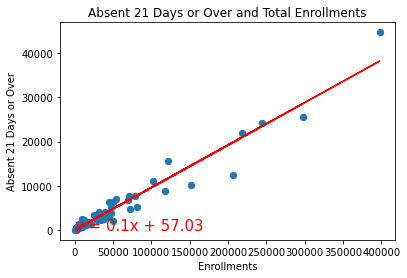

In [189]:
# Calculate the correlation coefficient and linear regression model 
# for enrollment and absent 21 days or over per district
correlation = sts.pearsonr(absents["Enrollments"],absents["Absent 21 Days or Over"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = absents["Enrollments"]
y_values = absents["Absent 21 Days or Over"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
absents.plot(kind="scatter", x="Enrollments", y="Absent 21 Days or Over", s=40, figsize=(6,4),
                 title="Absent 21 Days or Over and Total Enrollments")
plt.ylabel('Absent 21 Days or Over')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=15,color="red")
plt.show()

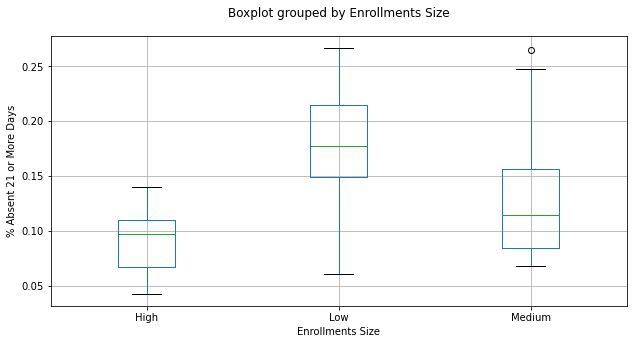

F_onewayResult(statistic=16.84108674314894, pvalue=1.440059315122827e-06)

In [187]:
absents.boxplot("% Absent 21 or More Days", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('% Absent 21 or More Days')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = absents[absents["Enrollments Size"] == "Low"]["% Absent 21 or More Days"]
prop_medium = absents[absents["Enrollments Size"] == "Medium"]["% Absent 21 or More Days"]
prop_high = absents[absents["Enrollments Size"] == "High"]["% Absent 21 or More Days"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

# Demographic Membership Analysis

In [207]:
demographic_membership = district_demographics[["District Name", "Total Dropout Rate", "Enrollments", "White", "Black or African American", 
                                               "Hispanic/Latino", "Asian", "Native Hawaiian or Other Pacific Islander", 
                                               "American Indian or Alaska Native", "Two or More Races_x", "Total_x"]]

perc_white = demographic_membership["White"]/demographic_membership["Enrollments"]
perc_black = demographic_membership["Black or African American"]/demographic_membership["Enrollments"]
perc_hispanic = demographic_membership["Hispanic/Latino"]/demographic_membership["Enrollments"]
# perc_asain = demographic_membership["Asian"]/demographic_membership["Enrollments"]
# perc_islander = demographic_membership["Native Hawaiian or Other Pacific Islander"]/demographic_membership["Enrollments"]
perc_am_ind = demographic_membership["American Indian or Alaska Native"]/demographic_membership["Enrollments"]
perc_two = demographic_membership["Two or More Races_x"]/demographic_membership["Enrollments"]

demographic_membership["White % from Enrollments"] = perc_white
demographic_membership["Black or African American % from Enrollments"] = perc_black
demographic_membership["Hispanic/Latino % from Enrollments"] = perc_hispanic
# demographic_membership["Asain % from Enrollments"] = perc_asain
# demographic_membership["Native Hawaiian or Other Pacific Islander % from Enrollmets"] = perc_islander
demographic_membership["American Indian or Alaska Native % from Enrollments"] = perc_am_ind
demographic_membership["Two or More Races % from Enrollments"] = perc_two

# create a list of our conditions
conditions = [
    (demographic_membership["Enrollments"] <= 6000),
    (demographic_membership["Enrollments"] > 6000) & (demographic_membership["Enrollments"] < 35000),
    (demographic_membership["Enrollments"] >= 35000)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
demographic_membership['Enrollments Size'] = np.select(conditions, values)


demographic_membership

/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,District Name,Total Dropout Rate,Enrollments,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races_x,Total_x,White % from Enrollments,Black or African American % from Enrollments,Hispanic/Latino % from Enrollments,American Indian or Alaska Native % from Enrollments,Two or More Races % from Enrollments,Enrollments Size
0,ALACHUA,0.028861,32688,12837,10177,2483,1370,28,55,1726,28676,0.392713,0.311337,0.0759606,0.00168257,0.0528023,Medium
1,BAKER,0.009673,5377,4096,572,92,20,2,14,141,4937,0.761763,0.106379,0.0171099,0.00260368,0.0262228,Low
2,BAY,0.011826,32074,19231,4229,1818,580,37,118,1548,27561,0.599582,0.131851,0.0566814,0.00367899,0.0482634,Medium
3,BRADFORD,0.006283,3820,2269,727,67,25,12,6,80,3186,0.593979,0.190314,0.0175393,0.00157068,0.0209424,Low
4,BREVARD,0.008279,81394,45137,10607,9727,1508,92,166,5042,72279,0.554549,0.130317,0.119505,0.00203946,0.0619456,High
5,BROWARD,0.014282,297615,61716,105778,81542,9410,339,790,6832,266407,0.207369,0.355419,0.273985,0.00265444,0.0229558,High
6,CALHOUN,0.022472,2556,1736,241,146,9,1,12,128,2273,0.679186,0.0942879,0.0571205,0.00469484,0.0500782,Low
7,CHARLOTTE,0.035536,18356,11445,1457,2209,235,21,47,717,16131,0.623502,0.0793746,0.120342,0.00256047,0.0390608,Medium
8,CITRUS,0.014999,17130,12370,698,1113,274,20,52,596,15123,0.722125,0.0407472,0.0649737,0.00303561,0.0347928,Medium
9,CLAY,0.010588,39922,24293,5006,3799,925,114,76,1624,35837,0.608512,0.125395,0.0951606,0.00190371,0.0406793,High


In [208]:
# Calculate the correlation coefficient and linear regression model 
# for enrollemnt and total demographic membership per district
correlation = sts.pearsonr(demographic_membership["Enrollments"],demographic_membership["Total_x"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = demographic_membership["Enrollments"]
y_values = demographic_membership["Total_x"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
demographic_membership.plot(kind="scatter", x="Enrollments", y="Total_x", s=40, figsize=(6,4),
                 title="Total Membership and Total Enrollments")
plt.ylabel('Total Membership')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=15,color="red")
plt.show()

The correlation between both factors is 1.0


AttributeError: 'float' object has no attribute 'shape'

In [209]:
# Ttest to compare the mean dropout rate from the sample of above districts and the total districts
# population = florida_dropout_rate['Total Dropout Rate']
# above_sample = florida_dropout_rate_median_above['Total Dropout Rate']

# sts.ttest_1samp(above_sample, population.mean())

In [210]:
# Ttest to compare the mean dropout rate from the sample of below districts and the total districts
# below_sample = florida_dropout_rate_median_below['Total Dropout Rate']

# sts.ttest_1samp(above_sample, population.mean())

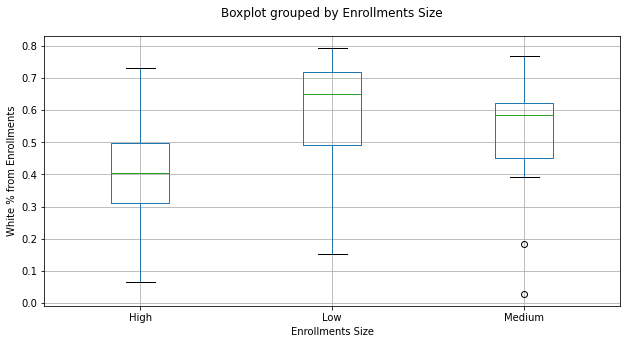

F_onewayResult(statistic=6.4705288213837076, pvalue=0.002804322887820159)

In [211]:
demographic_membership.boxplot("White % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('White % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demographic_membership[demographic_membership["Enrollments Size"] == "Low"]["White % from Enrollments"]
prop_medium = demographic_membership[demographic_membership["Enrollments Size"] == "Medium"]["White % from Enrollments"]
prop_high = demographic_membership[demographic_membership["Enrollments Size"] == "High"]["White % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

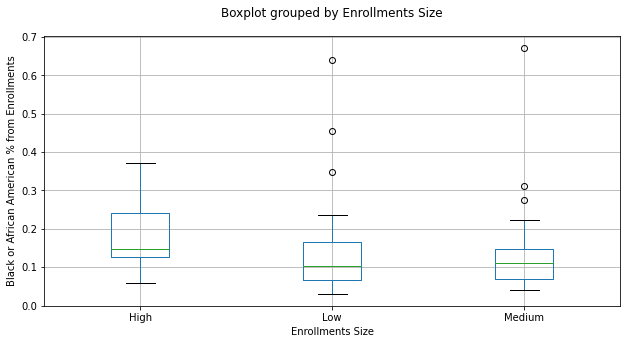

F_onewayResult(statistic=0.402929943656742, pvalue=0.6700963131974034)

In [212]:
demographic_membership.boxplot("Black or African American % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Black or African American % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demographic_membership[demographic_membership["Enrollments Size"] == "Low"]["Black or African American % from Enrollments"]
prop_medium = demographic_membership[demographic_membership["Enrollments Size"] == "Medium"]["Black or African American % from Enrollments"]
prop_high = demographic_membership[demographic_membership["Enrollments Size"] == "High"]["Black or African American % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

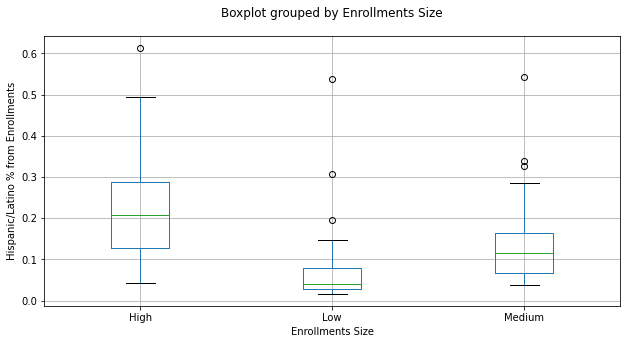

F_onewayResult(statistic=5.629104766142061, pvalue=0.005670182952303578)

In [213]:
demographic_membership.boxplot("Hispanic/Latino % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Hispanic/Latino % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demographic_membership[demographic_membership["Enrollments Size"] == "Low"]["Hispanic/Latino % from Enrollments"]
prop_medium = demographic_membership[demographic_membership["Enrollments Size"] == "Medium"]["Hispanic/Latino % from Enrollments"]
prop_high = demographic_membership[demographic_membership["Enrollments Size"] == "High"]["Hispanic/Latino % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

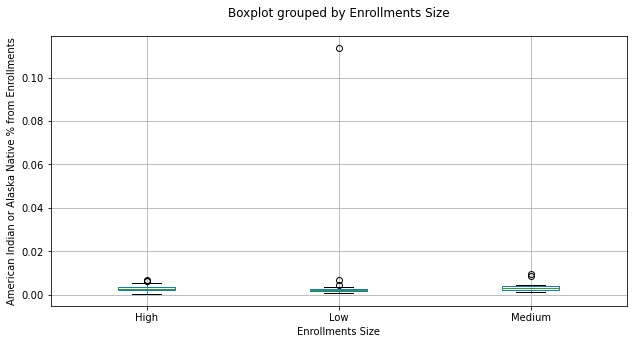

F_onewayResult(statistic=0.8717331349094943, pvalue=0.42328844911559005)

In [214]:
demographic_membership.boxplot("American Indian or Alaska Native % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('American Indian or Alaska Native % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demographic_membership[demographic_membership["Enrollments Size"] == "Low"]["American Indian or Alaska Native % from Enrollments"]
prop_medium = demographic_membership[demographic_membership["Enrollments Size"] == "Medium"]["American Indian or Alaska Native % from Enrollments"]
prop_high = demographic_membership[demographic_membership["Enrollments Size"] == "High"]["American Indian or Alaska Native % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

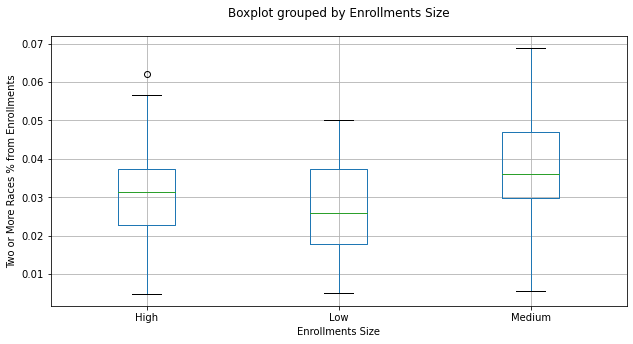

F_onewayResult(statistic=2.798751337961834, pvalue=0.06859495464630895)

In [215]:
demographic_membership.boxplot("Two or More Races % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Two or More Races % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demographic_membership[demographic_membership["Enrollments Size"] == "Low"]["Two or More Races % from Enrollments"]
prop_medium = demographic_membership[demographic_membership["Enrollments Size"] == "Medium"]["Two or More Races % from Enrollments"]
prop_high = demographic_membership[demographic_membership["Enrollments Size"] == "High"]["Two or More Races % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

# Lunches Analysis

In [218]:
demo_lunch = district_demographics[["District Name", "Total Dropout Rate", "Enrollments", "White Total", "Black or African American Total", 
                                               "Hispanic or Latino Total", "Asian Total", "Native Hawaiian or Other Pacific Islander Total", 
                                               "American Indian or Alaska Native Total", "Two or More Races_y", "Total_y"]]

perc_white_lunch = demo_lunch["White Total"]/demo_lunch["Enrollments"]
perc_black_lunch = demo_lunch["Black or African American Total"]/demo_lunch["Enrollments"]
perc_hispanic_lunch = demo_lunch["Hispanic or Latino Total"]/demo_lunch["Enrollments"]
perc_asain_lunch = demo_lunch["Asian Total"]/demo_lunch["Enrollments"]
perc_islander_lunch = demo_lunch["Native Hawaiian or Other Pacific Islander Total"]/demo_lunch["Enrollments"]
perc_am_ind_lunch = demo_lunch["American Indian or Alaska Native Total"]/demo_lunch["Enrollments"]
perc_two_lunch = demo_lunch["Two or More Races_y"]/demo_lunch["Enrollments"]

demo_lunch["White Lunch % from Enrollments"] = perc_white_lunch
demo_lunch["Black or African American Lunch % from Enrollments"] = perc_black_lunch
demo_lunch["Hispanic or Latino Lunch % from Enrollments"] = perc_hispanic_lunch
demo_lunch["Asain Lunch % from Enrollments"] = perc_asain_lunch
demo_lunch["Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets"] = perc_islander_lunch
demo_lunch["American Indian or Alaska Native Lunch % from Enrollments"] = perc_am_ind_lunch
demo_lunch["Two or More Races Lunch % from Enrollments"] = perc_two_lunch

# create a list of our conditions
conditions = [
    (demo_lunch["Enrollments"] <= 6000),
    (demo_lunch["Enrollments"] > 6000) & (demo_lunch["Enrollments"] < 35000),
    (demo_lunch["Enrollments"] >= 35000)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
demo_lunch['Enrollments Size'] = np.select(conditions, values)


demo_lunch

/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,District Name,Total Dropout Rate,Enrollments,White Total,Black or African American Total,Hispanic or Latino Total,Asian Total,Native Hawaiian or Other Pacific Islander Total,American Indian or Alaska Native Total,Two or More Races_y,Total_y,White Lunch % from Enrollments,Black or African American Lunch % from Enrollments,Hispanic or Latino Lunch % from Enrollments,Asain Lunch % from Enrollments,Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets,American Indian or Alaska Native Lunch % from Enrollments,Two or More Races Lunch % from Enrollments,Enrollments Size
0,ALACHUA,0.028861,32688,3625,8025,1293,282,12,27,987,6858,0.110897,0.245503,0.039556,0.008627,0.000367,0.000826,0.030195,Medium
1,BAKER,0.009673,5377,2256,523,63,10,1,11,114,1432,0.419565,0.097266,0.011717,0.001860,0.000186,0.002046,0.021201,Low
2,BAY,0.011826,32074,10473,3581,1316,316,27,82,1092,8214,0.326526,0.111648,0.041030,0.009852,0.000842,0.002557,0.034046,Medium
3,BRADFORD,0.006283,3820,1526,649,57,7,10,6,69,1131,0.399476,0.169895,0.014921,0.001832,0.002618,0.001571,0.018063,Low
4,BREVARD,0.008279,81394,18400,8368,6044,462,54,92,2913,17632,0.226061,0.102809,0.074256,0.005676,0.000663,0.001130,0.035789,High
5,BROWARD,0.014282,297615,21407,87683,50469,3963,222,419,3774,81121,0.071928,0.294619,0.169578,0.013316,0.000746,0.001408,0.012681,High
6,CALHOUN,0.022472,2556,1109,204,122,3,0,9,96,747,0.433881,0.079812,0.047731,0.001174,0.000000,0.003521,0.037559,Low
7,CHARLOTTE,0.035536,18356,6681,1242,1782,153,12,36,527,5028,0.363968,0.067662,0.097080,0.008335,0.000654,0.001961,0.028710,Medium
8,CITRUS,0.014999,17130,7911,558,866,109,8,37,473,4894,0.461821,0.032574,0.050555,0.006363,0.000467,0.002160,0.027612,Medium
9,CLAY,0.010588,39922,9893,3127,2200,341,29,39,833,7897,0.247808,0.078328,0.055107,0.008542,0.000726,0.000977,0.020866,High


The correlation between both factors is 0.99


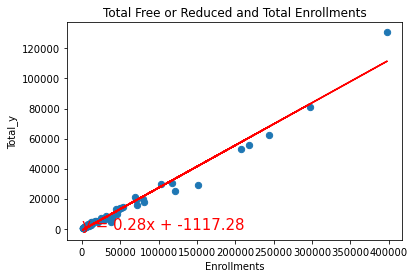

In [241]:
# Calculate the correlation coefficient and linear regression model 
# for enrollment and total free or reduced lunches per district
correlation = sts.pearsonr(demo_lunch["Enrollments"],demo_lunch["Total_y"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = demo_lunch["Enrollments"]
y_values = demo_lunch["Total_y"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
demo_lunch.plot(kind="scatter", x="Enrollments", y="Total_y", s=40, figsize=(6,4),
                 title="Total Free or Reduced and Total Enrollments")
plt.ylabel('Total_y')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=15,color="red")
plt.show()

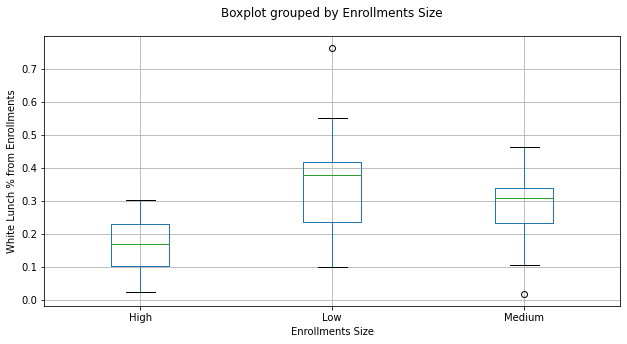

F_onewayResult(statistic=14.257706403564855, pvalue=8.049033699573514e-06)

In [220]:
demo_lunch.boxplot("White Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('White Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["White Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["White Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["White Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

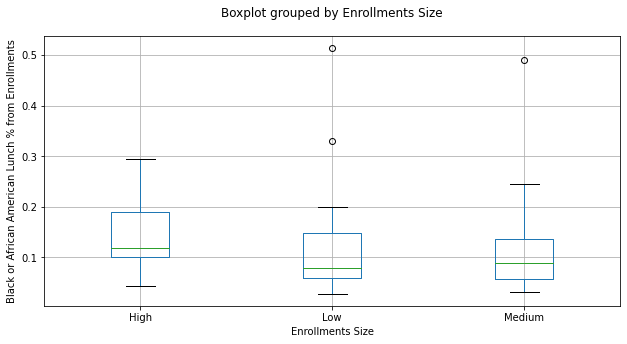

F_onewayResult(statistic=0.3122990378255936, pvalue=0.7329070095584597)

In [221]:
demo_lunch.boxplot("Black or African American Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Black or African American Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["Black or African American Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["Black or African American Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["Black or African American Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

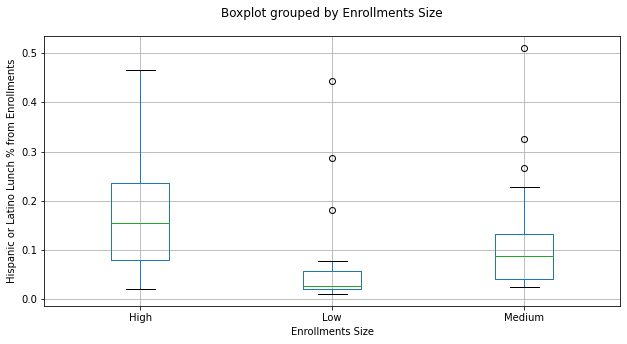

F_onewayResult(statistic=3.6321057333285087, pvalue=0.03223789291266712)

In [222]:
demo_lunch.boxplot("Hispanic or Latino Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Hispanic or Latino Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["Hispanic or Latino Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["Hispanic or Latino Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["Hispanic or Latino Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

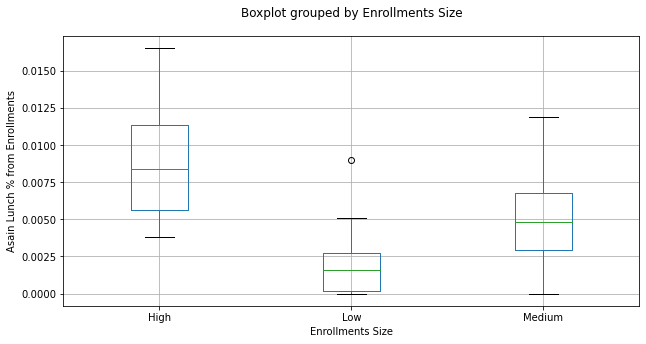

F_onewayResult(statistic=29.250182925550973, pvalue=1.1311053192470035e-09)

In [223]:
demo_lunch.boxplot("Asain Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Asain Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["Asain Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["Asain Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["Asain Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

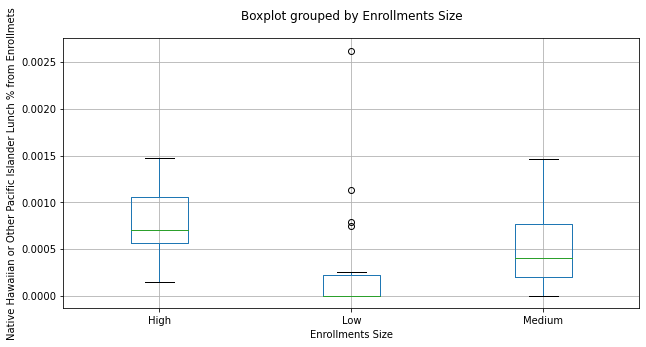

F_onewayResult(statistic=5.69315683121001, pvalue=0.0053712469240095135)

In [224]:
demo_lunch.boxplot("Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["Native Hawaiian or Other Pacific Islander Lunch % from Enrollmets"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

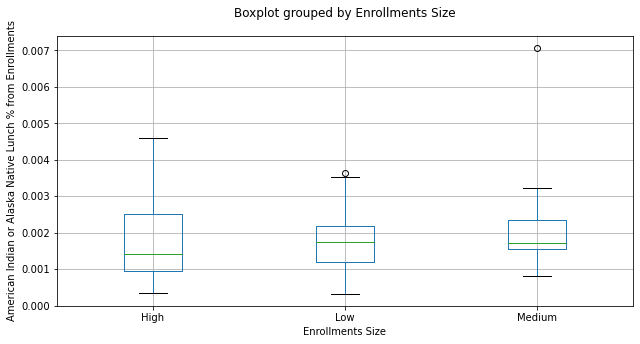

F_onewayResult(statistic=0.3286863774286952, pvalue=0.7211153982453085)

In [225]:
demo_lunch.boxplot("American Indian or Alaska Native Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('American Indian or Alaska Native Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["American Indian or Alaska Native Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["American Indian or Alaska Native Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["American Indian or Alaska Native Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

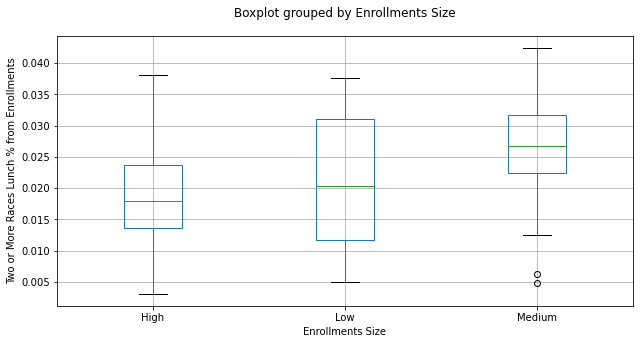

F_onewayResult(statistic=2.9212281659813546, pvalue=0.061318835315817555)

In [226]:
demo_lunch.boxplot("Two or More Races Lunch % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Two or More Races Lunch % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_lunch[demo_lunch["Enrollments Size"] == "Low"]["Two or More Races Lunch % from Enrollments"]
prop_medium = demo_lunch[demo_lunch["Enrollments Size"] == "Medium"]["Two or More Races Lunch % from Enrollments"]
prop_high = demo_lunch[demo_lunch["Enrollments Size"] == "High"]["Two or More Races Lunch % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

# Dropouts Demographics Analysis

In [240]:
demo_dropout = district_demographics[["District Name", "Total Dropout Rate", "Enrollments", "White Total Dropouts", "Black or African American Total Dropouts", 
                                               "Hispanic or Latino Total Dropouts", "Asian Total Dropouts", "Native Hawaiian or Other Pacific Islander Total Dropouts", 
                                               "American Indian or Alaska Native Total Dropouts", "Two or More Races Dropouts", "Total Dropouts"]]

perc_white_drop = demo_dropout["White Total Dropouts"]/demo_dropout["Enrollments"]
perc_black_drop = demo_dropout["Black or African American Total Dropouts"]/demo_dropout["Enrollments"]
perc_hispanic_drop = demo_dropout["Hispanic or Latino Total Dropouts"]/demo_dropout["Enrollments"]
# perc_asain_drop = demo_dropout["Asian Total Dropouts"]/demo_dropout["Enrollments"]
# perc_islander_drop = demo_dropout["Native Hawaiian or Other Pacific Islander Total Dropouts"]/demo_dropout["Enrollments"]
# perc_am_ind_drop = demo_dropout["American Indian or Alaska Native Total Dropouts"]/demo_dropout["Enrollments"]
# perc_two_drop = demo_dropout["Two or More Races Dropouts"]/demo_dropout["Enrollments"]

demo_dropout["White Dropout % from Enrollments"] = perc_white_drop
demo_dropout["Black or African American Dropout % from Enrollments"] = perc_black_drop
demo_dropout["Hispanic or Latino Dropout % from Enrollments"] = perc_hispanic_drop
# demo_dropout["Asain Dropout % from Enrollments"] = perc_asain_drop
# demo_dropout["Native Hawaiian or Other Pacific Islander Dropout % from Enrollmets"] = perc_islander_drop
# demo_dropout["American Indian or Alaska Native Dropout % from Enrollments"] = perc_am_ind_drop
# demo_dropout["Two or More Races Dropout % from Enrollments"] = perc_two_drop

# # create a list of our conditions
conditions = [
    (demo_dropout["Enrollments"] <= 6000),
    (demo_dropout["Enrollments"] > 6000) & (demo_dropout["Enrollments"] < 35000),
    (demo_dropout["Enrollments"] >= 35000)
    ]

# # create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# # create a new column and use np.select to assign values to it using our lists as arguments
demo_dropout['Enrollments Size'] = np.select(conditions, values)


demo_dropout

/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tabithahead/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,District Name,Total Dropout Rate,Enrollments,White Total Dropouts,Black or African American Total Dropouts,Hispanic or Latino Total Dropouts,Asian Total Dropouts,Native Hawaiian or Other Pacific Islander Total Dropouts,American Indian or Alaska Native Total Dropouts,Two or More Races Dropouts,Total Dropouts,White Dropout % from Enrollments,Black or African American Dropout % from Enrollments,Hispanic or Latino Dropout % from Enrollments,Enrollments Size
0,ALACHUA,0.028861,32688,58,174,17,1,*,1,14,265,0.00177435,0.005323,0.000520069,Medium
1,BAKER,0.009673,5377,13,0,0,*,*,*,0,13,0.00241771,0.000000,0,Low
2,BAY,0.011826,32074,65,16,8,2,*,0,4,95,0.00202656,0.000499,0.000249423,Medium
3,BRADFORD,0.006283,3820,2,4,0,*,*,*,0,6,0.00052356,0.001047,0,Low
4,BREVARD,0.008279,81394,101,48,26,1,0,0,15,191,0.00124088,0.000590,0.000319434,High
5,BROWARD,0.014282,297615,235,754,235,16,1,4,15,1260,0.000789611,0.002533,0.000789611,High
6,CALHOUN,0.022472,2556,11,2,1,0,0,*,1,16,0.0043036,0.000782,0.000391236,Low
7,CHARLOTTE,0.035536,18356,165,20,23,1,*,0,4,213,0.00898889,0.001090,0.001253,Medium
8,CITRUS,0.014999,17130,63,6,5,0,*,0,4,79,0.00367776,0.000350,0.000291886,Medium
9,CLAY,0.010588,39922,97,27,2,0,0,0,5,131,0.00242974,0.000676,5.00977e-05,High


The correlation between both factors is 0.86


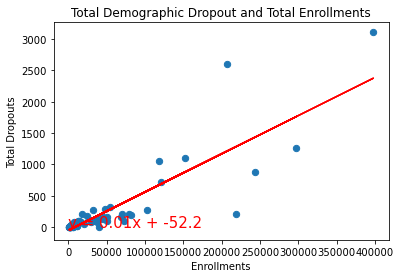

In [242]:
# Calculate the correlation coefficient and linear regression model 
# for enrollment and total  dropout per district
correlation = sts.pearsonr(demo_dropout["Enrollments"],demo_dropout["Total Dropouts"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = demo_dropout["Enrollments"]
y_values = demo_dropout["Total Dropouts"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
demo_dropout.plot(kind="scatter", x="Enrollments", y="Total Dropouts", s=40, figsize=(6,4),
                 title="Total Demographic Dropout and Total Enrollments")
plt.ylabel('Total Dropouts')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=15,color="red")
plt.show()

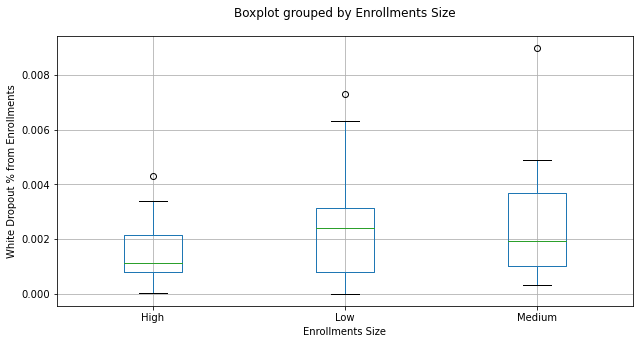

F_onewayResult(statistic=2.212386235339194, pvalue=0.11800761550942798)

In [243]:
demo_dropout.boxplot("White Dropout % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('White Dropout % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_dropout[demo_lunch["Enrollments Size"] == "Low"]["White Dropout % from Enrollments"]
prop_medium = demo_dropout[demo_lunch["Enrollments Size"] == "Medium"]["White Dropout % from Enrollments"]
prop_high = demo_dropout[demo_lunch["Enrollments Size"] == "High"]["White Dropout % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

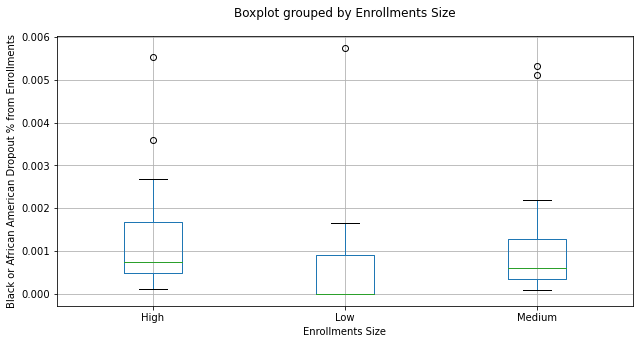

F_onewayResult(statistic=1.1369637349817983, pvalue=0.32738771980985365)

In [244]:
demo_dropout.boxplot("Black or African American Dropout % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Black or African American Dropout % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_dropout[demo_lunch["Enrollments Size"] == "Low"]["Black or African American Dropout % from Enrollments"]
prop_medium = demo_dropout[demo_lunch["Enrollments Size"] == "Medium"]["Black or African American Dropout % from Enrollments"]
prop_high = demo_dropout[demo_lunch["Enrollments Size"] == "High"]["Black or African American Dropout % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)

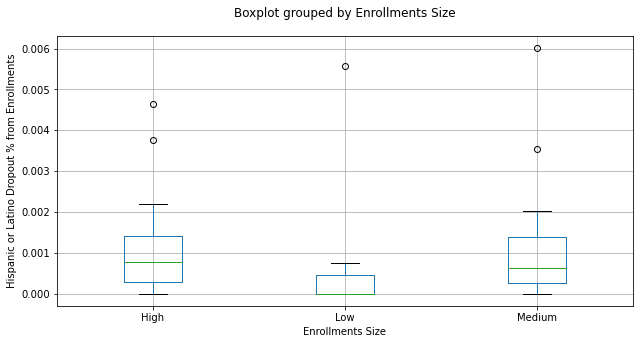

F_onewayResult(statistic=1.567367215657859, pvalue=0.21674561728701644)

In [245]:
demo_dropout.boxplot("Hispanic or Latino Dropout % from Enrollments", by="Enrollments Size", figsize=(10, 5))
plt.title('')
plt.ylabel('Hispanic or Latino Dropout % from Enrollments')
# plt.savefig('output_data/SHLat_Wind.png')
plt.show()

# Extract individual groups
prop_low = demo_dropout[demo_lunch["Enrollments Size"] == "Low"]["Hispanic or Latino Dropout % from Enrollments"]
prop_medium = demo_dropout[demo_lunch["Enrollments Size"] == "Medium"]["Hispanic or Latino Dropout % from Enrollments"]
prop_high = demo_dropout[demo_lunch["Enrollments Size"] == "High"]["Hispanic or Latino Dropout % from Enrollments"]

# Perform the ANOVA
sts.f_oneway(prop_low, prop_medium, prop_high)